# Simple Linear Regression

A simple linear regression is a method used to model the relationship between a dependent variable 𝑦 and an independent variable X using a straight line, defined as:

y=mx+b

Where:
- Y is the predicted value (dependent variable)
- X is the independent variable
- m is the slope of the line (how much y changes for each unit change in Y)
- b is the y-intercept (the value of y when X=0)


## Steps for Performing Simple Linear Regression:

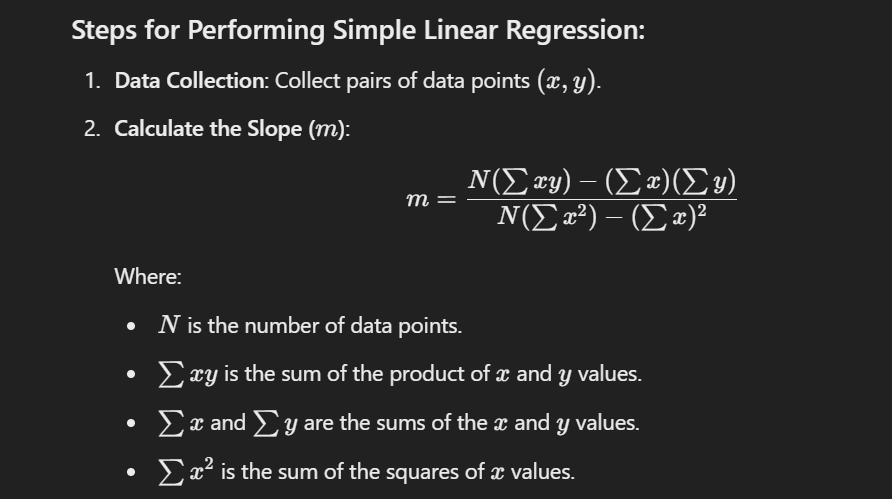

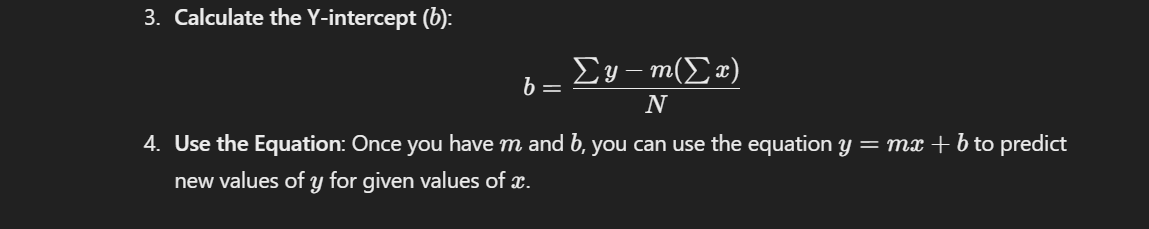

## Example of Simple Linear Regression

## Steps involved in machine learning

Let’s apply linear regression to a dataset containing years of experience and corresponding salaries. We’ll use Python and the scikit-learn library for this task.

- Data Preparation: Load the dataset and split it into features (years of experience) and target variable (salary).
- Model Creation: Use LinearRegression class from scikit-learn to create a linear regression model.
- Model Training: Fit the model to our data using the fit() method.
- Prediction: Predict salaries using the predict() method.
- Evaluation: Assess the model’s performance using metrics like Mean Squared Error or R-squared

### Use Case 1 - Predicting Salary

In [83]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [84]:
# Load the dataset
df = pd.read_csv('Salary_Data (1).csv')

In [85]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Let's understand the dataset! 

YearsExperience - It shows number of years of experience an employee has.

Salary - It shows corresponding salaries (in thousand) based on years of experience.

In [86]:
print(f'The shape of the dataset is {df.shape}')

The shape of the dataset is (30, 2)


In [87]:
'''Information about every column of this dataset'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [88]:
'''Checking if there is any null values in data'''

df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<Axes: >

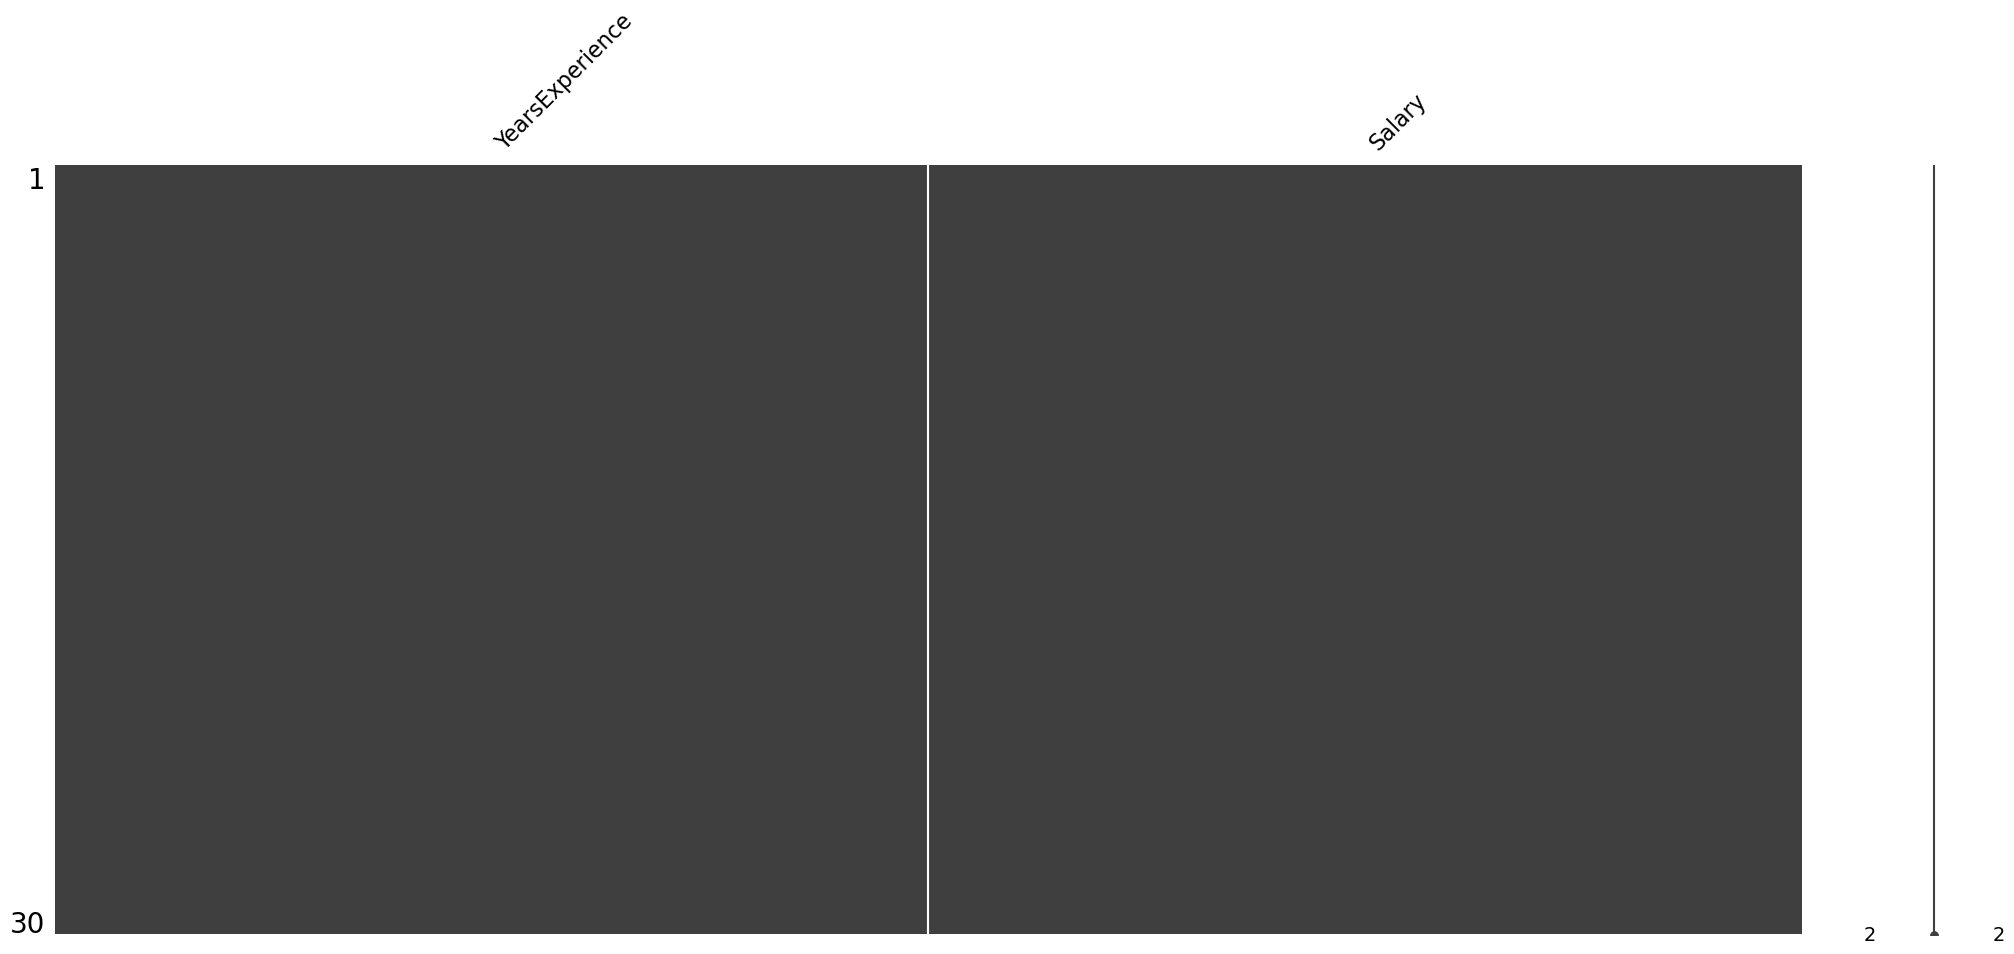

In [89]:
'''We can also visually represent that there is no missing data in the dataset'''


import missingno as msn
msn.matrix(df)

In [90]:
'''Statistical summary of the dataframe'''

df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


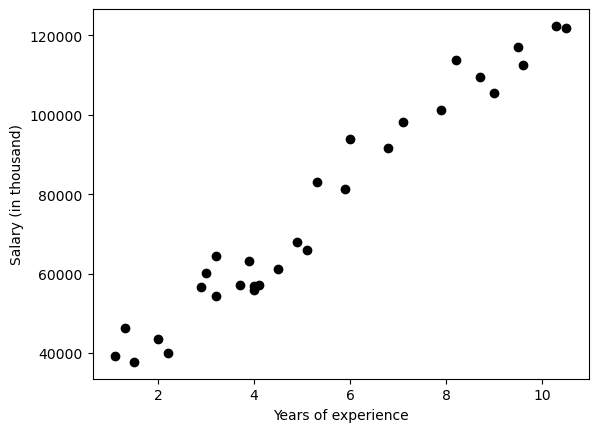

In [91]:
plt.scatter(df['YearsExperience'],df['Salary'],c='black')
plt.xlabel("Years of experience")
plt.ylabel("Salary (in thousand)")
plt.show()

### Split the dataset
Now we have to split the dataset into two parts, independent variable(Predictor) and dependent variable(target). We know, how much salary you will get is (usually) dependent of how many experience do you have in that respective field. So in our case the dependent variable is Salary and the independent variable is YearsExperience. Let's split the data into X (predictor) and Y (target)!

In [92]:
X = df[['YearsExperience']]

In [93]:
y = df[['Salary']]

### Train Test Split

- The training data is the data set used to train the machine learning model.

- The testing data is used to evaluate the performance of the trained model.It is used to estimate how well the model will perform on new, unseen data.

Simple Explanation by an example ____________

Suppose, I have 10 data that I can feed the ml model but I will not feed all 10 data, instead I will feed 8 data to the model and keep rest 2 data to myself. After feeding the 8 data I will ask the model to predict that 2 data which is though new for the ml model but I already know the answer as I have that 2 data. After getting the result from the model I will cross check if the answer is valid or not so that I can measure how much my model has actually learnt. Here that 8 data are train data and 2 data are test data.

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## Question?

 We will use Linear Regression model here. A question may arise why Linear regression as there are so many other algorithms available in ml?

Ans : The main purpose of using linear regression in machine learning is to predict a continuous(numerical) output variable based on one or more input variables. As the output variable(Salary) is continuous so we will use Linear regression model here Also Linear regression is a simple and straightforward model to implement and interpret, making it a good choice for beginners in machine learning. The coefficients of the model provide insight into how each input variable affects the output variable, making it easy to understand and explain the results. .

In [95]:
# Initialize a linear regression model object

lin_reg = LinearRegression()

In [96]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [97]:
y_pred = lin_reg.predict(X_test)

### Let's see regression line of our model.

Text(0, 0.5, 'Salary (in thousand)')

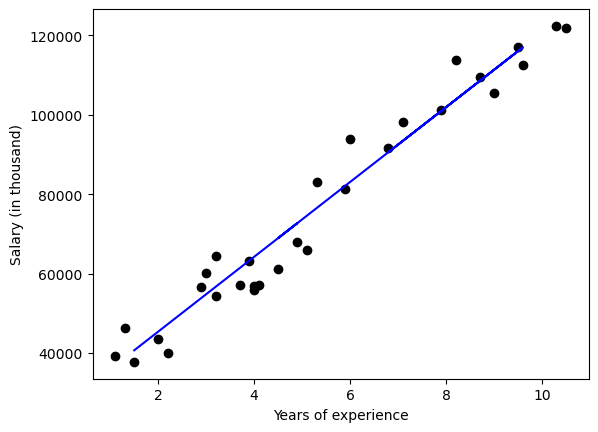

In [114]:
plt.scatter(X,y,color='black')
plt.plot(X_test,y_pred,color='blue')
plt.xlabel('Years of experience')
plt.ylabel('Salary (in thousand)')

### Model Evaluation

Now we will check the accuracy/efficiency of our model that how well did our model perform. Actually there are several method for doing that. As a beginner, it's better fro you to try some of them and then choose which method you will use. Some of the popular technique for model evaluation are:

- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R_2 score

Let's try each of them one by one!

N:B: Salary is given in thousand in this dataset

In [99]:
from sklearn.metrics import mean_absolute_error
print("The value of MAE is", mean_absolute_error(y_test,y_pred))

The value of MAE is 3655.0935961278933


There is no direct way to find RMSE. As RMSE is nothing but the square root of MSE so what we can do is we will just square root the value of MSE by using numpy's square root function

In [101]:
print('The value of RMSE is ',np.sqrt(mean_squared_error(Y_test,y_pred)))

The value of RMSE is  27319.58472111195


In [107]:
from sklearn.metrics import r2_score
print("R square is", (r2_score(y_test,y_pred)))

R square is 0.976568230600566


### Estimating the equation of Regression line

The equation of a regression line is a mathematical formula that represents the relationship between the independent variable (x) and the dependent variable (y) in a linear regression model. In its simplest form, the equation of a regression line can be represented as:

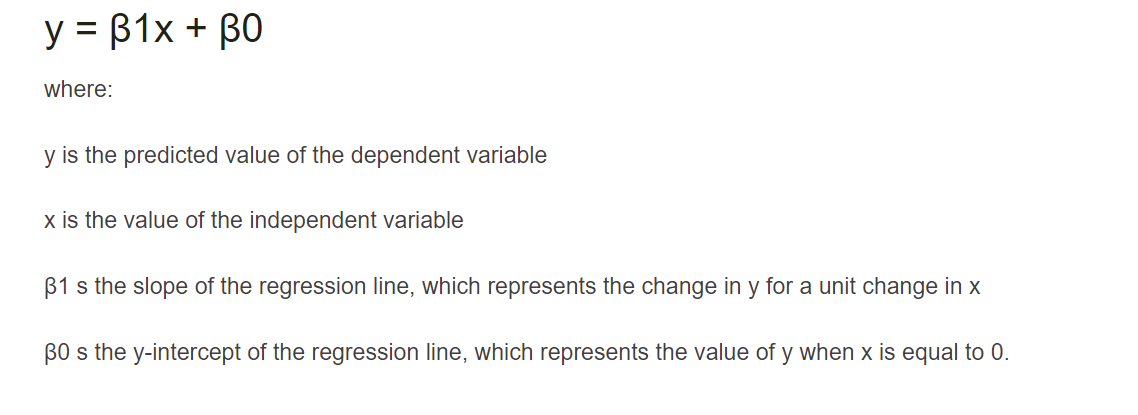

In [109]:
'''Finding the value of slope (β1) '''

β1 = lin_reg.coef_
print(f'The value of slope is {β1}')

The value of slope is [[9422.51054126]]


In [110]:
'''Finding the value of intercept (β0)'''

β0 = lin_reg.intercept_
print(f'The value of intercept is {β0}')

The value of intercept is [26532.00865174]
